In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('business_class_flights.csv')
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Air_India,Delhi,Evening,zero,Evening,Mumbai,Business,2.00,1,25612
1,Air_India,Delhi,Evening,zero,Night,Mumbai,Business,2.25,1,25612
2,Air_India,Delhi,Evening,one,Night,Mumbai,Business,24.75,1,42220
3,Air_India,Delhi,Night,one,Night,Mumbai,Business,26.50,1,44450
4,Air_India,Delhi,Evening,one,Night,Mumbai,Business,6.67,1,46690
...,...,...,...,...,...,...,...,...,...,...
93482,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
93483,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
93484,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
93485,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## Preprocessing

In [3]:
df = df.drop('class', axis=1)
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price
0,Air_India,Delhi,Evening,zero,Evening,Mumbai,2.00,1,25612
1,Air_India,Delhi,Evening,zero,Night,Mumbai,2.25,1,25612
2,Air_India,Delhi,Evening,one,Night,Mumbai,24.75,1,42220
3,Air_India,Delhi,Night,one,Night,Mumbai,26.50,1,44450
4,Air_India,Delhi,Evening,one,Night,Mumbai,6.67,1,46690
...,...,...,...,...,...,...,...,...,...
93482,Vistara,Chennai,Morning,one,Evening,Hyderabad,10.08,49,69265
93483,Vistara,Chennai,Afternoon,one,Night,Hyderabad,10.42,49,77105
93484,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,13.83,49,79099
93485,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,10.00,49,81585


## Training Regression Model

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [5]:
X,y = df.drop('price', axis=1), df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
# Label encoding on training dataset
encoder = LabelEncoder()
categorical_columns = ['airline', 'source_city', 'destination_city', 'arrival_time', 'departure_time', 'stops']
X_train = pd.get_dummies(X_train, columns=categorical_columns)

# Label encoding on test dataset
X_test = pd.get_dummies(X_test, columns=categorical_columns)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [7]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [8]:
# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [9]:
# XGBoost Regression
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [10]:
# Gradient Boosting Regression
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

## Plot the comparison of prediction results


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math

In [12]:
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)





In [13]:
# Calculate evaluation metrics for each model
metrics = {}

In [14]:
metrics['Random Forest'] = {
    'R2': r2_score(y_test, y_pred_rf),
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'RMSE': math.sqrt(mean_squared_error(y_test, y_pred_rf))
}

metrics['XGBoost'] = {
    'R2': r2_score(y_test, y_pred_xgb),
    'MAE': mean_absolute_error(y_test, y_pred_xgb),
    'MSE': mean_squared_error(y_test, y_pred_xgb),
    'RMSE': math.sqrt(mean_squared_error(y_test, y_pred_xgb))
}

metrics['Gradient Boosting'] = {
    'R2': r2_score(y_test, y_pred_gb),
    'MAE': mean_absolute_error(y_test, y_pred_gb),
    'MSE': mean_squared_error(y_test, y_pred_gb),
    'RMSE': math.sqrt(mean_squared_error(y_test, y_pred_gb))
}

In [15]:
# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics).T
metrics_df.reset_index(inplace=True)
metrics_df.columns = ['Model', 'R2', 'MAE', 'MSE', 'RMSE']


C:\Users\Admin\AppData\Local\Temp\ipykernel_5520\1300958434.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=metrics_df, palette='viridis')
C:\Users\Admin\AppData\Local\Temp\ipykernel_5520\1300958434.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=metrics_df, palette='viridis')
C:\Users\Admin\AppData\Local\Temp\ipykernel_5520\1300958434.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=metrics_df, palette='viridis')
C:\Users\Admin\AppData\Local\Temp\ipyker

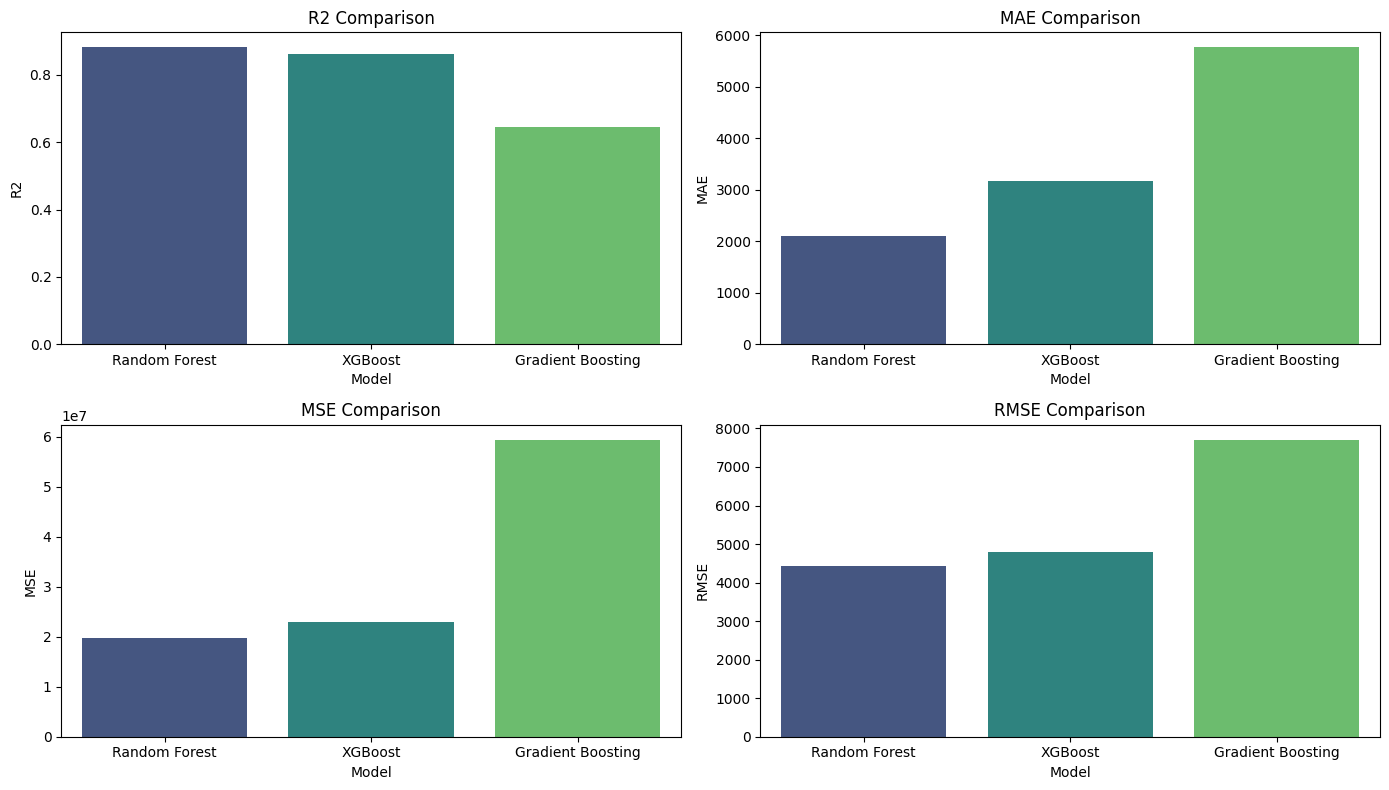

In [16]:
# Plot evaluation metrics comparison
plt.figure(figsize=(14, 8))

# 使用 Seaborn 绘制 R2, MAE, MSE 和 RMSE 的条形图
for idx, metric in enumerate(['R2', 'MAE', 'MSE', 'RMSE']):
    plt.subplot(2, 2, idx + 1)
    sns.barplot(x='Model', y=metric, data=metrics_df, palette='viridis')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.title(f'{metric} Comparison')

plt.tight_layout()
plt.show()

In [17]:
results = pd.DataFrame({
    'Actual': y_test,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb,
    'Gradient Boosting': y_pred_gb
})

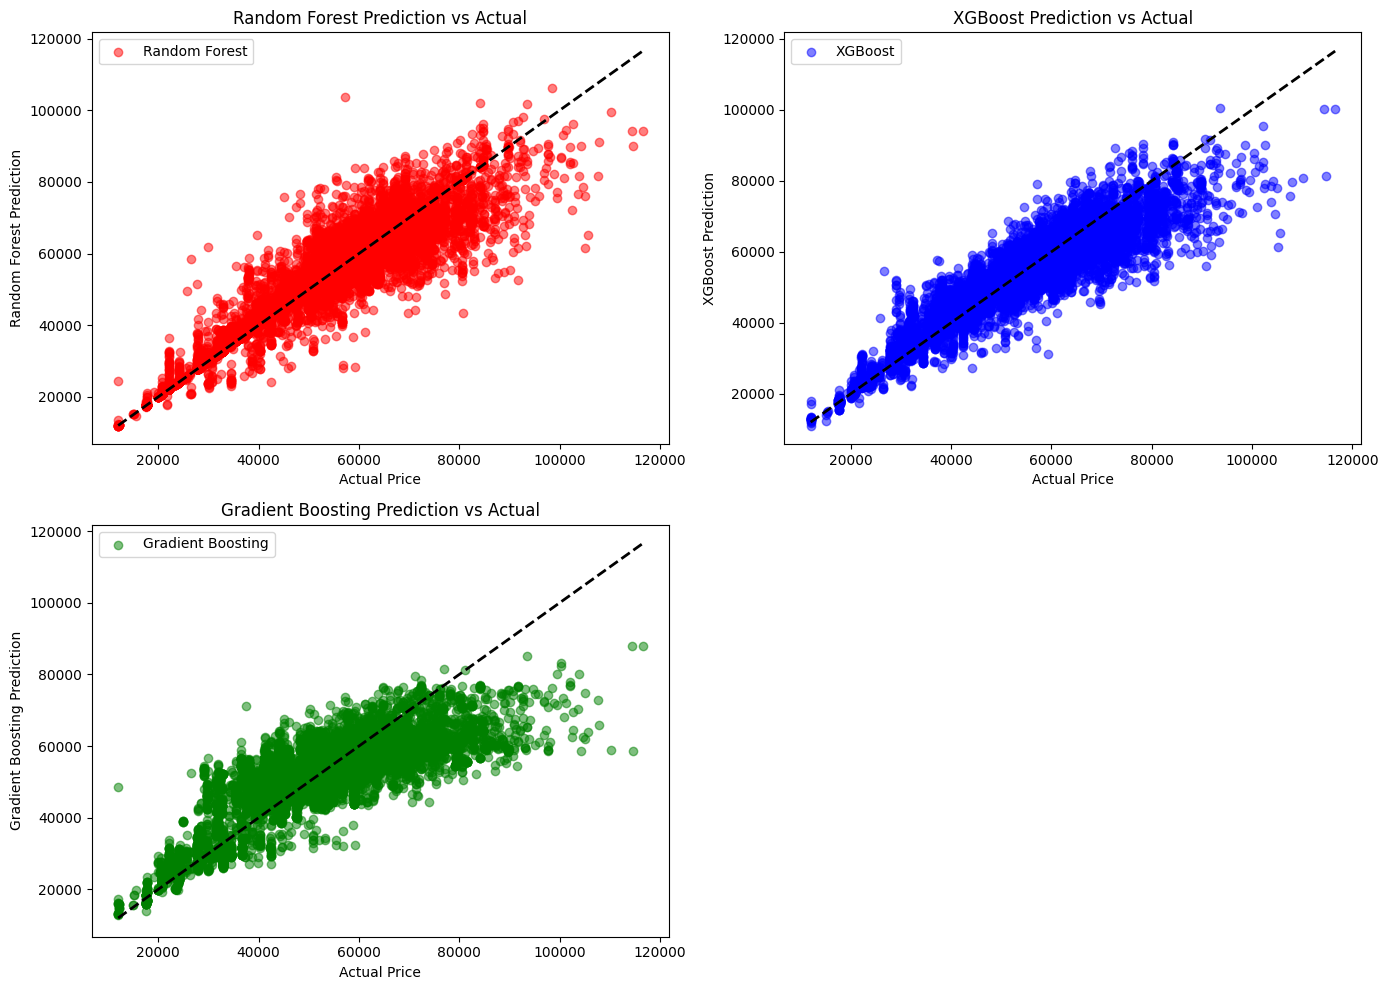

In [18]:
# Plot scatter plot comparison
plt.figure(figsize=(14, 10))

# 绘制实际结果与模型预测的散点图
# Plot scatter plots of actual vs. predictions from each model
plt.subplot(2, 2, 1)
plt.scatter(results['Actual'], results['Random Forest'], color='red', alpha=0.5, label='Random Forest')
plt.xlabel('Actual Price')
plt.ylabel('Random Forest Prediction')
plt.title('Random Forest Prediction vs Actual')
plt.plot([results['Actual'].min(), results['Actual'].max()], [results['Actual'].min(), results['Actual'].max()], 'k--', lw=2)  # 对角线
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(results['Actual'], results['XGBoost'], color='blue', alpha=0.5, label='XGBoost')
plt.xlabel('Actual Price')
plt.ylabel('XGBoost Prediction')
plt.title('XGBoost Prediction vs Actual')
plt.plot([results['Actual'].min(), results['Actual'].max()], [results['Actual'].min(), results['Actual'].max()], 'k--', lw=2)  # 对角线
plt.legend()

plt.subplot(2, 2, 3)
plt.scatter(results['Actual'], results['Gradient Boosting'], color='green', alpha=0.5, label='Gradient Boosting')
plt.xlabel('Actual Price')
plt.ylabel('Gradient Boosting Prediction')
plt.title('Gradient Boosting Prediction vs Actual')
plt.plot([results['Actual'].min(), results['Actual'].max()], [results['Actual'].min(), results['Actual'].max()], 'k--', lw=2)  # 对角线
plt.legend()

plt.tight_layout()
plt.show()

## Parameter Tune

In [19]:

from sklearn.model_selection import GridSearchCV


In [20]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [21]:
rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

KeyboardInterrupt: 

In [22]:
from sklearn.model_selection import RandomizedSearchCV

In [23]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [24]:
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=param_grid,
    n_iter=100,  # 选择要进行的随机搜索次数
    cv=5,  # 交叉验证折数
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42  # 可选的随机种子，用于复现结果
)

In [28]:
# 执行随机搜索
random_search.fit(X_train, y_train)

# 输出最佳参数
best_params = random_search.best_params_
print("Best parameters found: ", best_params)

# 使用最佳参数创建和拟合最佳模型
best_rf = RandomForestRegressor(**best_params)
best_rf.fit(X_train, y_train)

y_pred_best = best_rf.predict(X_test)

d:\MachineLearning\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
210 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
168 fits failed with the following error:
Traceback (most recent call last):
  File "d:\MachineLearning\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\MachineLearning\.venv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "d:\MachineLearning\.venv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "d:\MachineLearning\.venv\Lib\site-packag

Best parameters found:  {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}


## Comparision after tuning

In [30]:
y_pred_before = rf_model.predict(X_test)

r2_score_before = r2_score(y_test, y_pred_before)
mae_before = mean_absolute_error(y_test, y_pred_before)
mse_before = mean_squared_error(y_test, y_pred_before)
rmse_before = math.sqrt(mse_before)

In [31]:
r2_score_best = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = math.sqrt(mse_best)

In [32]:
data = {
    'Metric': ['R2', 'MAE', 'MSE', 'RMSE'],
    'Before Tuning': [r2_score_before, mae_before, mse_before, rmse_before],
    'After Tuning': [r2_score_best, mae_best, mse_best, rmse_best]
}
df = pd.DataFrame(data)


### Comparision of Index

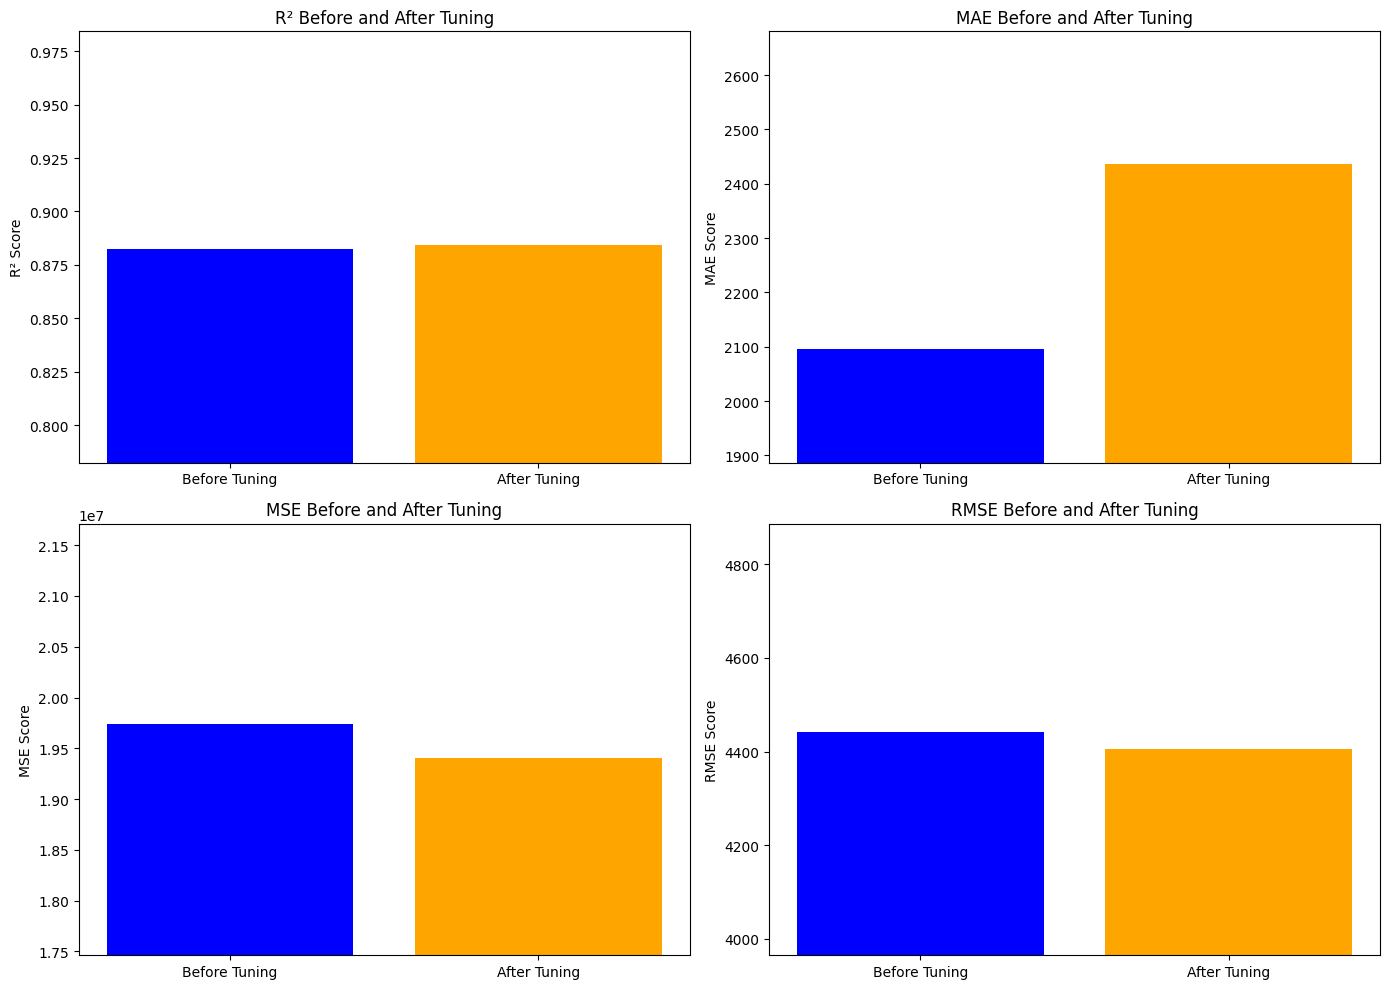

In [33]:
# 设置图表布局
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 绘制 R² 对比图
axes[0, 0].bar(['Before Tuning', 'After Tuning'], [r2_score_before, r2_score_best], color=['blue', 'orange'])
axes[0, 0].set_title('R² Before and After Tuning')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].set_ylim([min(r2_score_before, r2_score_best) - 0.1, max(r2_score_before, r2_score_best) + 0.1])


# 绘制 MAE 对比图
axes[0, 1].bar(['Before Tuning', 'After Tuning'], [mae_before, mae_best], color=['blue', 'orange'])
axes[0, 1].set_title('MAE Before and After Tuning')
axes[0, 1].set_ylabel('MAE Score')
axes[0, 1].set_ylim([min(mae_before, mae_best) * 0.9, max(mae_before, mae_best) * 1.1])


# 绘制 MSE 对比图
axes[1, 0].bar(['Before Tuning', 'After Tuning'], [mse_before, mse_best], color=['blue', 'orange'])
axes[1, 0].set_title('MSE Before and After Tuning')
axes[1, 0].set_ylabel('MSE Score')
axes[1, 0].set_ylim([min(mse_before, mse_best) * 0.9, max(mse_before, mse_best) * 1.1])


# 绘制 RMSE 对比图
axes[1, 1].bar(['Before Tuning', 'After Tuning'], [rmse_before, rmse_best], color=['blue', 'orange'])
axes[1, 1].set_title('RMSE Before and After Tuning')
axes[1, 1].set_ylabel('RMSE Score')
axes[1, 1].set_ylim([min(rmse_before, rmse_best) * 0.9, max(rmse_before, rmse_best) * 1.1])


# 调整布局
plt.tight_layout()
plt.show()

### Comparision of Prediction result


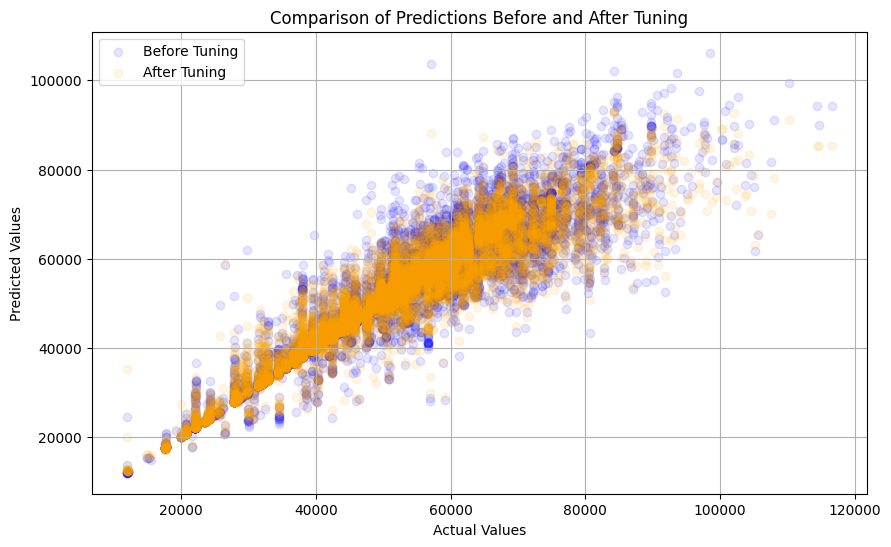

In [35]:
plt.figure(figsize=(10, 6))

# 绘制调参前的预测结果
plt.scatter(y_test, y_pred_before, alpha=0.1, color='blue', label='Before Tuning')

# 绘制调参后的预测结果
plt.scatter(y_test, y_pred_best, alpha=0.1, color='orange', label='After Tuning')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predictions Before and After Tuning')
plt.legend()
plt.grid(True)

plt.show()

In [36]:
feature_importances = best_rf.feature_importances_

features = X_train.columns
importances = pd.Series(feature_importances, index=features)
importances = importances.sort_values(ascending=False)


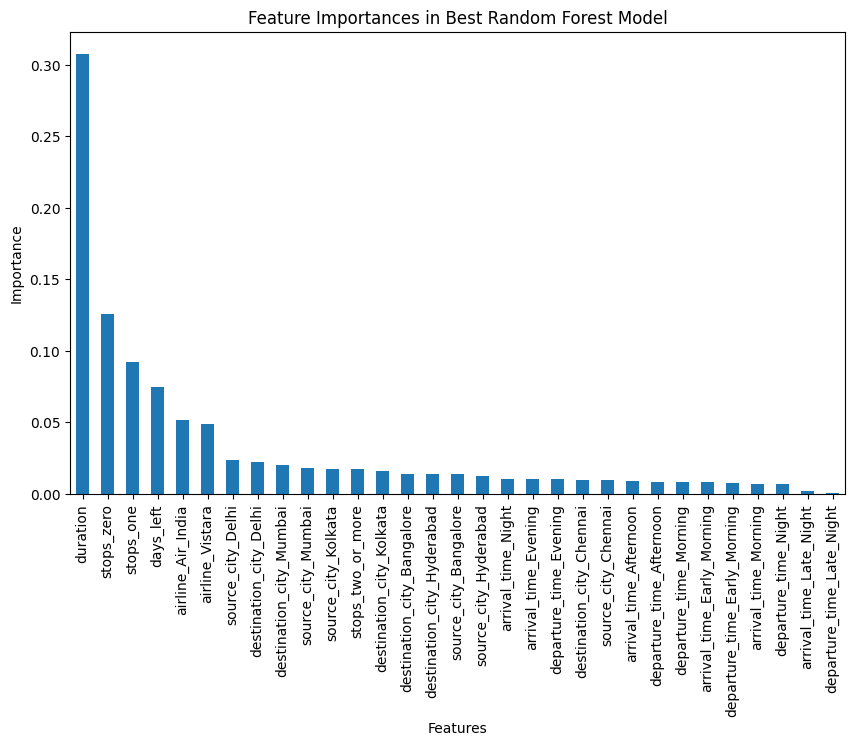

In [37]:
plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title('Feature Importances in Best Random Forest Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

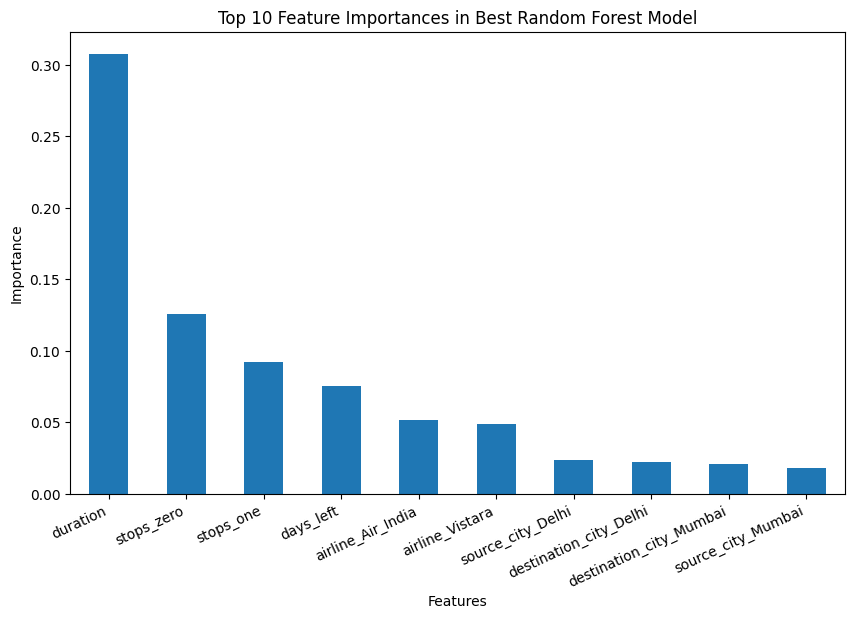

In [42]:
top_10_importances = importances[:10]

# 绘制前10个特征的重要性柱状图
plt.figure(figsize=(10, 6))
top_10_importances.plot(kind='bar')
plt.title('Top 10 Feature Importances in Best Random Forest Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=25, ha='right')
plt.show()